Trial 5 Complete [00h 06m 02s]
val_accuracy: 0.8197747468948364

Best val_accuracy So Far: 0.8210262656211853
Total elapsed time: 00h 19m 21s
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.8061 - loss: 0.4945 - val_accuracy: 0.8117 - val_loss: 0.4720
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - accuracy: 0.8123 - loss: 0.4811 - val_accuracy: 0.8117 - val_loss: 0.4714
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step - accuracy: 0.8049 - loss: 0.4921 - val_accuracy: 0.8117 - val_loss: 0.4728
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.8130 - loss: 0.4753 - val_accuracy: 0.8117 - val_loss: 0.4725
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 87ms/step - accuracy: 0.8101 - loss: 0.4808 - val_accuracy: 0.8117 - val_loss: 0.4715
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 127ms/step - accuracy: 0.8198 - loss: 0.4675 - val_accuracy: 0.8117 - val_loss: 0.4719
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.8183 - loss: 0.4657 - val_accuracy: 0.8112 - val_loss: 0.4699
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 98ms/step - accuracy: 0.8146 - loss: 0.4725 - val_accurac

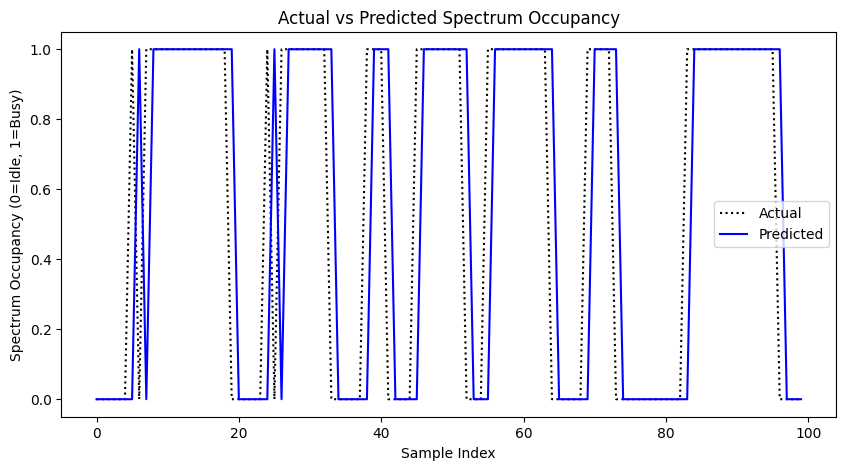

Confusion Matrix:
[[795 188]
 [190 824]]

✅ Accuracy:  0.8107
✅ Precision: 0.8142
✅ Recall:    0.8126
✅ F1 Score:  0.8134


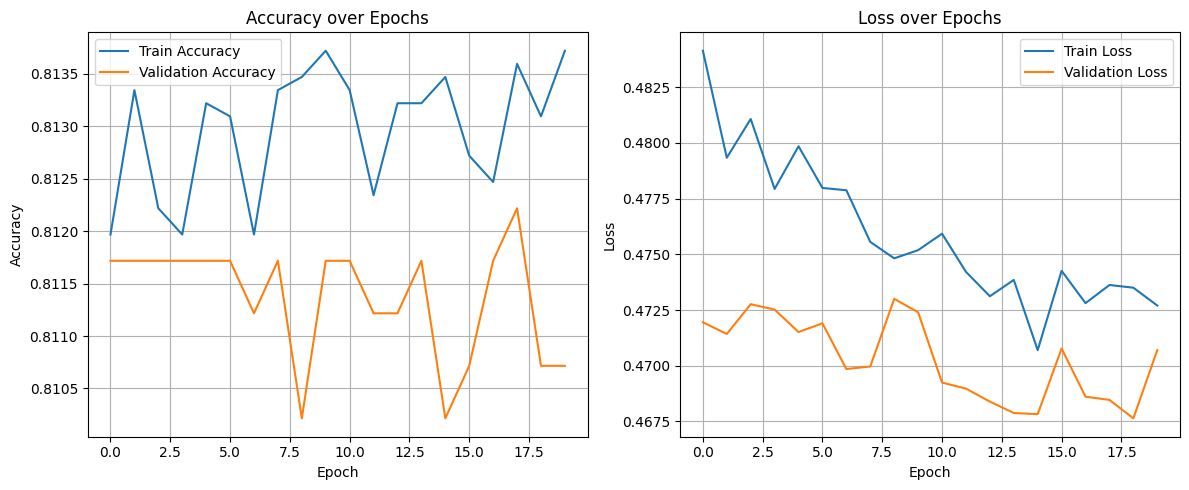

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt

# Generate synthetic spectrum occupancy data with stronger temporal correlation
def generate_data(samples=10000, timesteps=15):
    np.random.seed(42)
    data = np.random.randint(0, 2, size=(samples,))
    data = np.convolve(data, np.ones(5)/5, mode='same') > 0.4  # Increase correlation
    X, y = [], []
    for i in range(len(data) - timesteps):
        X.append(data[i:i + timesteps])
        y.append(data[i + timesteps])
    return np.array(X), np.array(y)

# Load and preprocess data
timesteps = 15
X, y = generate_data(samples=10000, timesteps=timesteps)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
y = np.array(y)

# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build improved LSTM model
def build_lstm_model():
    model = Sequential([
        LSTM(128, return_sequences=True, activation='tanh', input_shape=(timesteps, 1)),
        BatchNormalization(),
        Dropout(0.4),
        LSTM(128, return_sequences=False, activation='tanh'),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.MeanSquaredError()])
    return model

model = build_lstm_model()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Plot actual vs predicted spectrum occupancy
plt.figure(figsize=(10,5))
plt.plot(y_test[:100], label='Actual', linestyle='dotted', color='black')
plt.plot(y_pred_binary[:100], label='Predicted', linestyle='solid', color='blue')
plt.xlabel("Sample Index")
plt.ylabel("Spectrum Occupancy (0=Idle, 1=Busy)")
plt.title("Actual vs Predicted Spectrum Occupancy")
plt.legend()
plt.show()

# Print final MSE values
final_train_mse = history.history['mean_squared_error'][-1]
final_val_mse = history.history['val_mean_squared_error'][-1]
print(f"\nFinal Training MSE: {final_train_mse:.4f}")
print(f"Final Validation MSE: {final_val_mse:.4f}")

# Plot MSE over epochs
plt.figure(figsize=(8, 5))
plt.plot(history.history['mean_squared_error'], label='Training MSE', color='blue')
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training vs Validation MSE Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


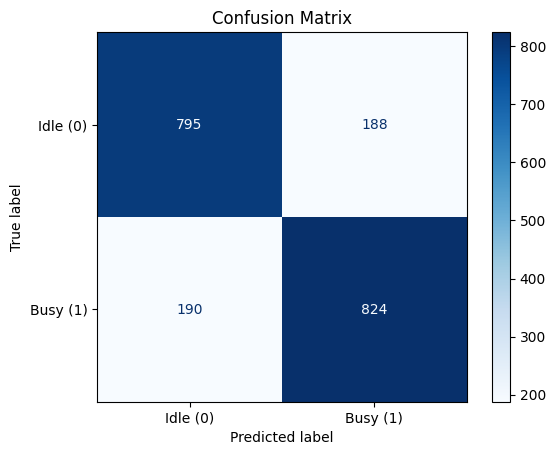

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Idle (0)", "Busy (1)"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)

print(f"Mean Squared Error: {mse}")
print(f"Accuracy: {accuracy * 100:.2f}%")

Mean Squared Error: 0.18928392588883325
Accuracy: 81.07%


In [ ]:
import numpy as np

# Assuming X_train is a NumPy array with boolean values (True/False)
true_count_train = np.count_nonzero(X_train)

print(f"Number of True values in X_train: {true_count_train}")

Number of True values in X_train: 58922


In [ ]:
import numpy as np

# Assuming X_train is a NumPy array with boolean values (True/False)
true_count_train = np.count_nonzero(X_train)
false_count_train = np.count_nonzero(X_train == False)  # or X_train.shape[0] - true_count_train

print(f"Number of True values in X_train: {true_count_train}")
print(f"Number of False values in X_train: {false_count_train}")

Number of True values in X_train: 58922
Number of False values in X_train: 60898


In [ ]:
true_count = 7040
false_count = 132680

total_count = true_count + false_count

weight_true = false_count / total_count
weight_false = true_count / total_count

print(f"Weight for True: {weight_true:.4f}")
print(f"Weight for False: {weight_false:.4f}")

Weight for True: 0.9496
Weight for False: 0.0504


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 0.81
Recall: 0.81
F1 Score: 0.81
